<h1><center><b>BIKE SHARING ASSIGNMENT</center></h1></b>
<div style="text-align: right"> Author : Jithin Prakash K </div>


___
# **Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.  
  
  
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lock down comes to an end, and the economy restores to a healthy state.   
  
  
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.  
  
  
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

**Business Goal:**  
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

**Data Preparation:**

- You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
- You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

**Model Building**

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.

**Model Evaluation:**
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

 
```
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
 ```

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

# ***Import Libraries***

In [1]:
## Code to import Google Drive on Colab
# from google.colab             import drive
# drive.mount('/content/gdrive')

import pandas                 as pd
import numpy                  as np
import seaborn                as sns
import matplotlib.pyplot      as plt
import datetime

# Disabling/Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

# Random State used
RANDOM_STT = 939

# **Step 1 : Reading and Understanding the Data**

**Reading the file to DataFrame using Pandas**

In [2]:
# df_bike = pd.read_csv('/content/gdrive/My Drive/Bike Sharing Assignment/day.csv') # for Colab
df_bike = pd.read_csv('day.csv')                                                    # for Julyter anaconda

**Checking the top 5 records of data using head**

In [3]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Shape of the data**

In [4]:
df_bike.shape

(730, 16)

**Analyzing data types and the null values**

In [5]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- *There are no null values observed*
- *season,	yr,	mnth,	holiday,	weekday,	workingday,	weathersit - Categorical columns have int64 datatype*

**Dropping the columns**
- *instant : This is the id for records - not needed for the regression* 
- *dteday : This is already present as month year*

In [6]:
df_bike.drop(columns=['instant','dteday'],inplace=True)
df_bike.shape

(730, 14)

**Changing the season to Categories**

In [7]:
df_bike.season = df_bike.season.map({
                                        1:'spring', 
                                        2:'summer', 
                                        3:'fall', 
                                        4:'winter'})


**Changing the Month to Categories**

In [8]:
df_bike.mnth   = df_bike.mnth.apply(lambda x : datetime.date(1900, x, 1).strftime('%B') )

**Changing the WeekDay to Categories**

In [9]:
df_bike.weekday = df_bike.weekday.apply(lambda x : ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'][x])

**Changing Weathersit to Categories**

In [10]:
df_bike.weathersit = df_bike.weathersit.apply(lambda x: 
                          ('clear','mist_or_cloudy',
                           'light_snow_or_rain','heavy_snow_or_rain')[x-1])

# **Step 2 : Visualizing the Data**

In [11]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,January,0,Mon,1,mist_or_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,January,0,Tue,1,mist_or_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,January,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,January,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,January,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


**Describe** the data

In [13]:
df_bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Analyzing Unique data in columns**

In [14]:
df_bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

*Year, Holiday, Workingday has binary data (1 or 0) indicating the year as 2018 or 2019, Holiday or not, Workingday or not*

### **Check for Outliers for Numeric Data**
___

**Describe the numerical data**

In [15]:
df_bike[['temp','atemp','hum','windspeed','casual','registered','cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Distribution plots**

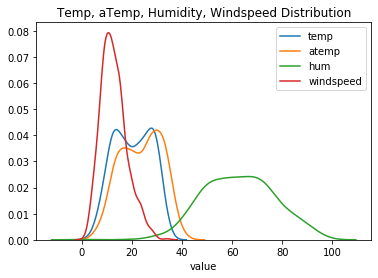

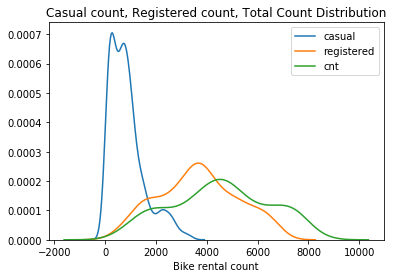

In [16]:
for i,col_name in enumerate(['temp','atemp','hum','windspeed']):
    sns.distplot(df_bike[col_name],label=col_name,hist=False)
plt.title('Temp, aTemp, Humidity, Windspeed Distribution')
plt.xlabel('value')
plt.legend()
plt.show()

print()

for col_name in ['casual','registered','cnt']:
    sns.distplot(df_bike[col_name],label=col_name,hist=False)
plt.title('Casual count, Registered count, Total Count Distribution')
plt.xlabel('Bike rental count')
plt.legend()
plt.show()

**Box Plots of numerical Data**

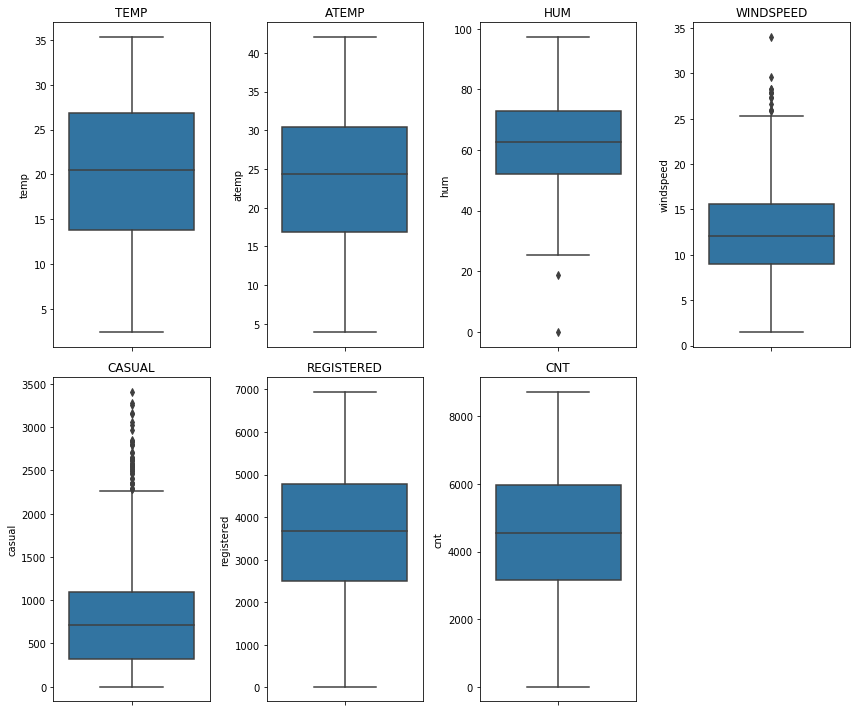

In [17]:
fig,ax = plt.subplots(2,4,figsize=(12,10))

for i,col_name in enumerate(['temp','atemp','hum','windspeed']):
    sns.boxplot(y=col_name,data=df_bike,ax=ax[0,i])
    ax[0,i].set_title(col_name.upper())

for i,col_name in enumerate(['casual','registered','cnt']):
    sns.boxplot(y=col_name,data=df_bike,ax=ax[1,i])
    ax[1,i].set_title(col_name.upper())

fig.delaxes(ax[1,-1])
fig.tight_layout()
plt.show()

### **Visualizing Year, Holiday, WorkingDay, WeatherSit against cnt**
___


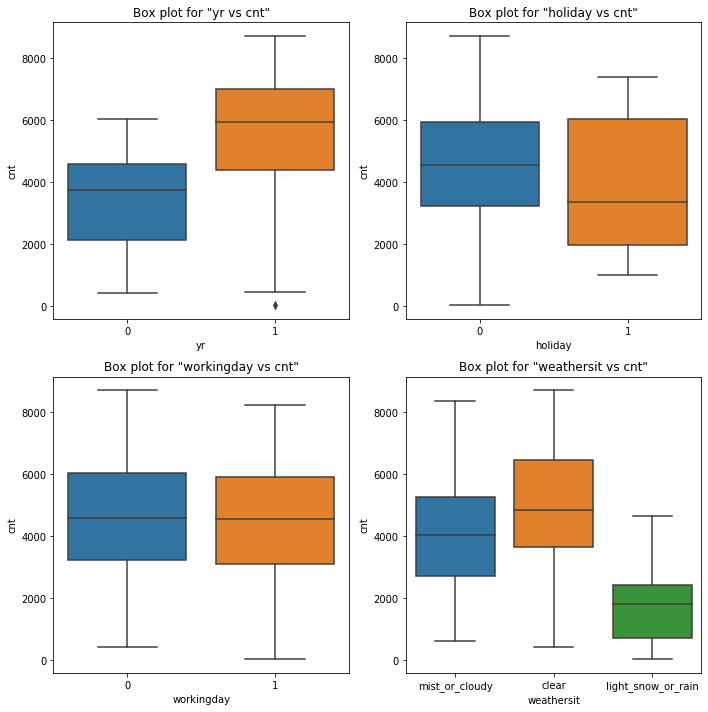

In [18]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
for ind,col_name in enumerate(['yr','holiday','workingday','weathersit']):
    sns.boxplot(y='cnt',x=col_name,data=df_bike, ax=ax.flatten()[ind])
    ax.flatten()[ind].set_title('Box plot for "'+col_name+' vs cnt"')
fig.tight_layout()
plt.show()

***Inference***
- *Total Number of Bike rental are higher in the year 2019*
- *The spread/distribution is wide for the number of rentals during holiday, However the mean and 25th percentile is higher for non holidays*
- *Distribution and mean of number of bike rental are similar irrespective of if it is a working day or not.*
- *Number of bike rental in a clear day has higher mean and is higher compared to mist or rainy day. Rainy/light snow days have the lowest bike rental count*



**Visualizing Season, Month and WeekDay against cnt**
___


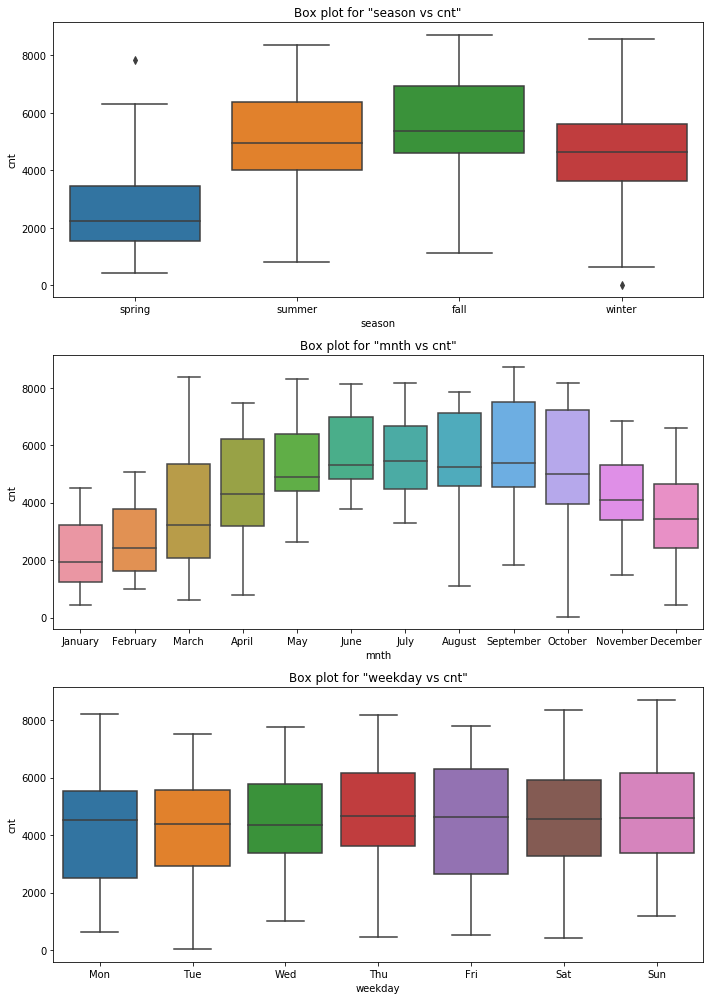

In [19]:
fig,ax = plt.subplots(3,1,figsize=(10,14))
for ind,col_name in enumerate(['season','mnth','weekday']):
    sns.boxplot(y='cnt',x=col_name,data=df_bike, ax=ax.flatten()[ind])
    ax.flatten()[ind].set_title('Box plot for "'+col_name+' vs cnt"')
fig.tight_layout()
plt.show()

***Inference***
- *Total Number of Bike rental are higher during fall and summer season and lowest during spring*
- *The bike rental shows a trend of increase from Jan through to September and gradually decreases the mean towards December*
- *Bike rental count medians for all the weekdays are approximately same.*



**Pairplot of numerical data**
___


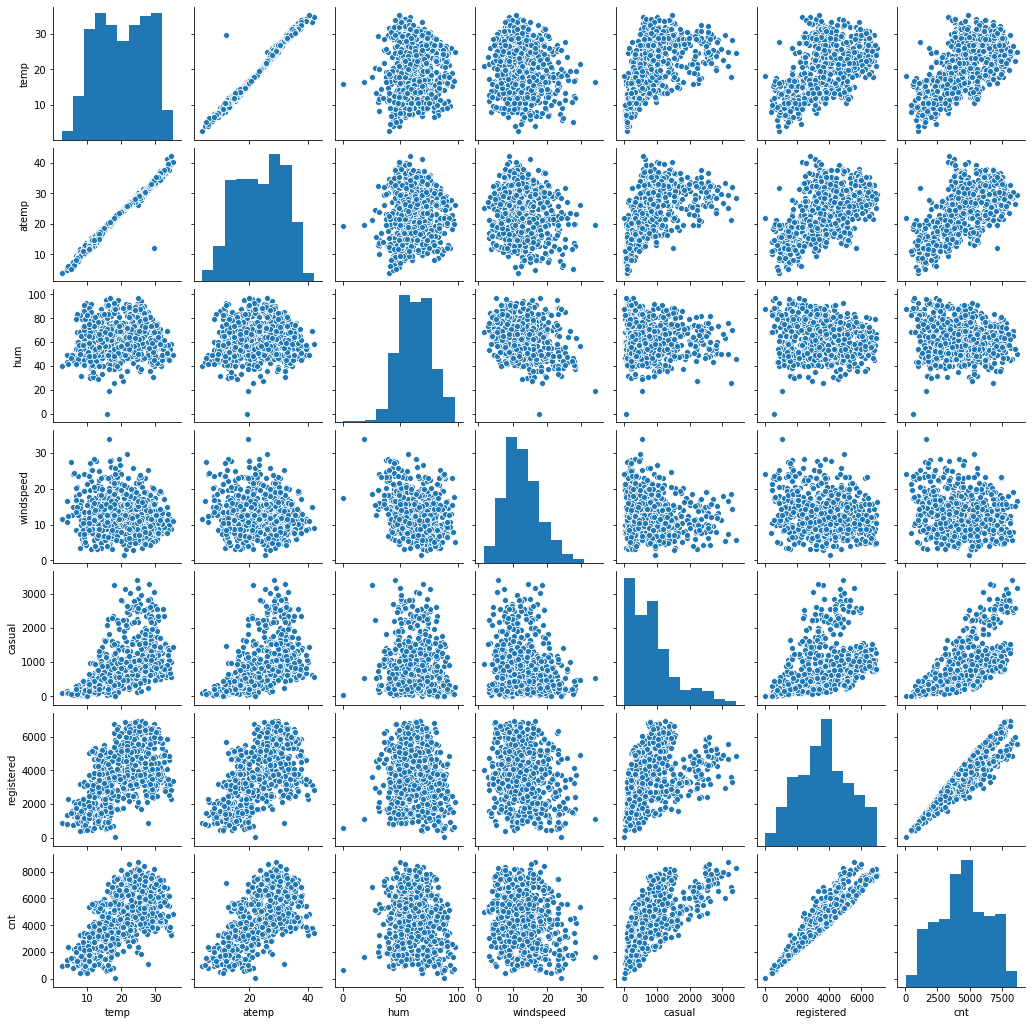

In [20]:
g = sns.pairplot(df_bike[['temp','atemp','hum','windspeed','casual','registered','cnt']])
g.fig.set_size_inches(14,14)
plt.show()

**Heatmap of correlations**

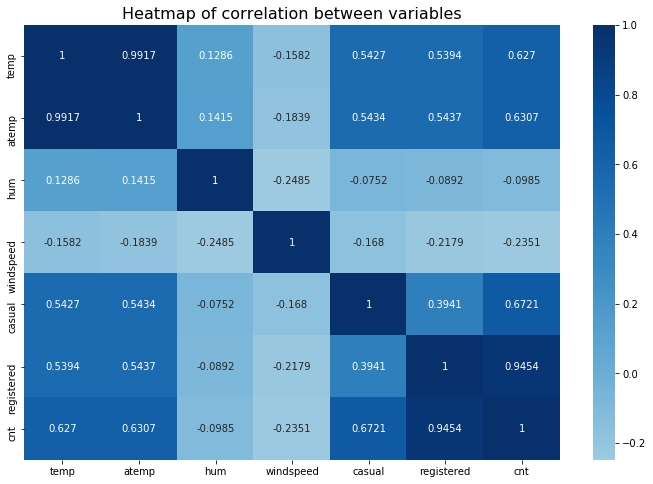

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df_bike[['temp','atemp','hum','windspeed','casual','registered','cnt']].\
            corr().round(4),cmap='Blues',annot=True,fmt='g',center=0)
plt.title('Heatmap of correlation between variables',fontsize=16)
plt.show()

In [22]:
sum(df_bike.casual+df_bike.registered!=df_bike.cnt)

0

- *casual & registered : This is the target, which is available in combined cnt as Target*

In [23]:
df_bike[['atemp','temp']].corr()

,atemp,temp
atemp,1.000000,0.991696
temp,0.991696,1.000000


**Inferences**
- *Clearly the Casual and Registered sums up to Total Count, So we can drop these 2 columns and retain CNT as Target*
- *Casual and cnt has high correlation*
- *Registered and cnt has high correlation*
- *temp and atemp has the very high correlation, so we can drop the feel like temperature and retain the original temperature, which is the actual temperature*

**Dropping the columns as per inferences above**

In [24]:
df_bike.drop(columns=['casual','registered','atemp'],inplace=True)
df_bike.shape

(730, 11)

**Analyzing correlation after dropping the features**

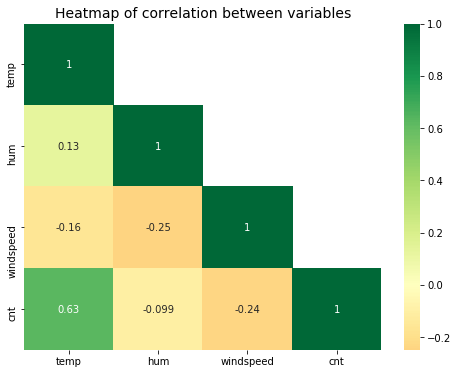

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(df_bike[['temp','hum','windspeed','cnt']].corr(),
            cmap='RdYlGn',annot=True,
            center=0,
            mask=np.triu(np.ones(4,dtype=bool),1))
plt.title('Heatmap of correlation between variables',fontsize=14)
plt.show()

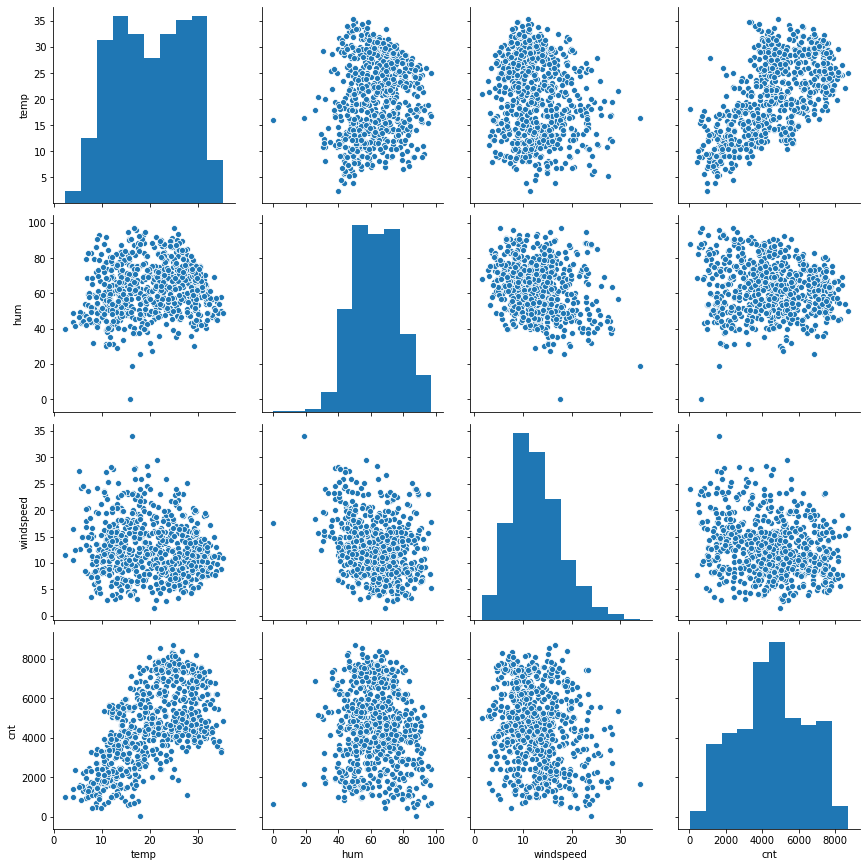

In [26]:
g=sns.pairplot(df_bike[['temp','hum','windspeed','cnt']])
g.fig.set_size_inches(12,12)
plt.show()

- *Temperature has high correlation with the bike rental count*
- *Wind speed has slight negative correlation with bike rental count*

**Describing the numeric features**

In [27]:
df_bike.describe().round(2)

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.0,730.00,730.00,730.00,730.00,730.00,730.00
mean,0.5,0.03,0.69,20.32,62.77,12.76,4508.01
std,0.5,0.17,0.46,7.51,14.24,5.20,1936.01
min,0.0,0.00,0.00,2.42,0.00,1.50,22.00
25%,0.0,0.00,0.00,13.81,52.00,9.04,3169.75
50%,0.5,0.00,1.00,20.47,62.62,12.13,4548.50
75%,1.0,0.00,1.00,26.88,72.99,15.63,5966.00
max,1.0,1.00,1.00,35.33,97.25,34.00,8714.00


**Inference**
- *temp : has a minimum of 2.42 and maximum of 35.33 degree Celsius with a median of 20.47 Celsius*
- *hum : humidity has a minimum of 0 and maximum of 97.25 with median at 62.62*
- *windspeed : windspeed has a minimum of 1.50 and maximum of 34.00 with median at 12.13*
- *cnt : minimum number of bikes rented a day is 22 and maximum is 8714 with a median rental at 4549*

# **Step 3 : Data Preparation**

**Encoding categorical variables by using pandas get_dummies :**

In [28]:
def bike_dummies(col_name):
    df_temp = pd.get_dummies(df_bike[col_name],drop_first=True)
    df_temp = pd.concat([df_temp,df_bike],axis=1)
    return df_temp.drop(columns=col_name)

for col_name in ['season','mnth','weekday','weathersit']:
    df_bike = bike_dummies(col_name)

df_bike.head()

,light_snow_or_rain,mist_or_cloudy,Mon,Sat,Sun,Thu,Tue,Wed,August,December,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


**Shape**

In [29]:
df_bike.shape

(730, 29)

**Analyzing the unique values in Columns**

In [30]:
df_bike.nunique()

light_snow_or_rain      2
mist_or_cloudy          2
Mon                     2
Sat                     2
Sun                     2
Thu                     2
Tue                     2
Wed                     2
August                  2
December                2
February                2
January                 2
July                    2
June                    2
March                   2
May                     2
November                2
October                 2
September               2
spring                  2
summer                  2
winter                  2
yr                      2
holiday                 2
workingday              2
temp                  498
hum                   594
windspeed             649
cnt                   695
dtype: int64

*All categorical columns are converted to binary data*

**Describe**

In [31]:
df_bike.describe().round(2)

,light_snow_or_rain,mist_or_cloudy,Mon,Sat,Sun,Thu,Tue,Wed,August,December,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,...,730.00,730.00,730.00,730.0,730.00,730.00,730.00,730.00,730.00,730.00
mean,0.03,0.34,0.14,0.14,0.14,0.14,0.14,0.14,0.08,0.08,...,0.25,0.25,0.24,0.5,0.03,0.69,20.32,62.77,12.76,4508.01
std,0.17,0.47,0.35,0.35,0.35,0.35,0.35,0.35,0.28,0.28,...,0.43,0.43,0.43,0.5,0.17,0.46,7.51,14.24,5.20,1936.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,2.42,0.00,1.50,22.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,13.81,52.00,9.04,3169.75
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.5,0.00,1.00,20.47,62.62,12.13,4548.50
75%,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,1.0,0.00,1.00,26.88,72.99,15.63,5966.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.0,1.00,1.00,35.33,97.25,34.00,8714.00


# **Step 4: Splitting the Data into Training and Testing Sets**

**Libraries used**

In [32]:
from sklearn.linear_model      import LinearRegression
from sklearn.preprocessing     import MinMaxScaler
from sklearn.model_selection   import train_test_split
from sklearn.metrics           import r2_score
from sklearn.feature_selection import RFE

import statsmodels.api         as sm

**Splitting data frame to train and test data frames**

  
- *70% data is chosen for train and 30% for test*

In [33]:
df_train, df_test = train_test_split(df_bike, test_size = 0.3, train_size = 0.7, random_state = RANDOM_STT)

**Shape of train and test data frames**

In [34]:
df_train.shape

(510, 29)

In [35]:
df_test.shape

(219, 29)

**Head of train and test data frames**

In [36]:
df_train.head()

,light_snow_or_rain,mist_or_cloudy,Mon,Sat,Sun,Thu,Tue,Wed,August,December,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
194,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,27.914153,47.6250,16.124689,5084
235,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,27.606653,60.5000,16.958236,5130
688,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,15.340847,68.5000,5.542575,5634
668,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,14.657500,66.6667,11.166689,5566
552,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,35.328347,49.2083,10.958118,4840


In [37]:
df_test.head()

,light_snow_or_rain,mist_or_cloudy,Mon,Sat,Sun,Thu,Tue,Wed,August,December,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
408,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,9.122500,41.1250,11.207961,3422
477,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,13.188347,76.6667,20.334232,3214
604,0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,1,29.861653,62.0000,12.791975,7040
598,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,27.367500,67.7083,4.708981,7375
171,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,27.914153,77.0417,11.458675,4835


## **Rescaling the features using Min-Max Scaler**

In [38]:
scaler = MinMaxScaler()

**Fit transform the training data with Min max scaler**

In [39]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [40]:
df_train.head()

,light_snow_or_rain,mist_or_cloudy,Mon,Sat,Sun,Thu,Tue,Wed,August,December,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
194,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.774672,0.489717,0.449986,0.582375
235,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0.765327,0.622108,0.475634,0.587667
688,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,0.392551,0.704370,0.124380,0.645651
668,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0.371783,0.685519,0.297431,0.637828
552,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1.000000,0.505998,0.291014,0.554303


**Defining X (independent) and y(dependent/target) variable**

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train

In [42]:
print(  'Shape of training set X : ',X_train.shape)
print(  'Shape of training set y : ',y_train.shape)

Shape of training set X :  (510, 28)
Shape of training set y :  (510,)


# **Step 5 : Building the Model**

## **Linear Regression using Statsmodels**

### **Linear Regression** - *Statsmodels*
___

In [43]:
def OLS_model(X_train_ols):
    X_train_sm = sm.add_constant(X_train_ols)
    lr = sm.OLS(y_train,X_train_sm).fit()
    #print(lr.params)
    print(lr.summary())

In [44]:
OLS_model(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     94.65
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          5.22e-176
Time:                        04:51:41   Log-Likelihood:                 527.15
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     481   BIC:                            -873.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4652      0

### **Using RFE for feature selection**

**Number of columns before RFE**

In [45]:
len(X_train.columns)

28

**RFE**

In [46]:
lm = LinearRegression()
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [47]:
df_rfe = pd.DataFrame()
df_rfe['feature'] = X_train.columns
df_rfe['rfe_support'] =rfe.support_
df_rfe['rfe_rank'] =rfe.ranking_

df_rfe.sort_values('rfe_rank',ascending=True).set_index('feature')

,rfe_support,rfe_rank
feature,,
light_snow_or_rain,True,1
temp,True,1
holiday,True,1
yr,True,1
winter,True,1
spring,True,1
September,True,1
November,True,1
hum,True,1


In [48]:
features = list(X_train.columns[rfe.support_])
print(features)

['light_snow_or_rain', 'mist_or_cloudy', 'December', 'February', 'January', 'July', 'November', 'September', 'spring', 'winter', 'yr', 'holiday', 'temp', 'hum', 'windspeed']


### **VIF to check multicollinearity**

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def getVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
    display(vif)

In [50]:
X_train_res = X_train[features]

In [51]:
getVIF(X_train_res)

,Features,VIF
0,hum,25.21
1,temp,16.71
2,windspeed,5.09
3,spring,4.49
4,winter,2.79
5,January,2.52
6,mist_or_cloudy,2.39
7,February,2.10
8,yr,2.03
9,November,1.79


### **Building model using statsmodel, for the detailed statistics**

In [52]:
OLS_model(X_train_res)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          3.08e-185
Time:                        04:51:41   Log-Likelihood:                 516.19
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     494   BIC:                            -932.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4218      0

- *Performance after RFE i.e. After reducing to 15 features is adjusted R$^2$ values is 85.4%, i.e. same as when all 28 feature was available*

### ***Removing Humidity***
***Humidity has high VIF > 5***

In [53]:
features.remove('hum')

In [54]:
X_train_res = X_train[features]
OLS_model(X_train_res)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          5.21e-181
Time:                        04:51:41   Log-Likelihood:                 503.39
No. Observations:                 510   AIC:                            -976.8
Df Residuals:                     495   BIC:                            -913.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3202      0

In [55]:
getVIF(X_train_res)

,Features,VIF
0,temp,5.24
1,windspeed,4.99
2,spring,4.21
3,winter,2.46
4,January,2.36
5,February,2.04
6,yr,2.02
7,November,1.76
8,December,1.58
9,mist_or_cloudy,1.56


### ***Removing July***
***p-Value > 0.05***

In [56]:
features.remove('July')
X_train_res = X_train[features]
OLS_model(X_train_res)
getVIF(X_train_res)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.04e-181
Time:                        04:51:41   Log-Likelihood:                 501.64
No. Observations:                 510   AIC:                            -975.3
Df Residuals:                     496   BIC:                            -916.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3288      0

,Features,VIF
0,windspeed,4.88
1,temp,4.35
2,spring,4.20
3,winter,2.43
4,January,2.36
5,February,2.04
6,yr,2.02
7,November,1.75
8,December,1.58
9,mist_or_cloudy,1.55


### ***Removing February***
***The month is covered in the spring season, Removing the month to check the change in accuracy***
***Removing to simplify the model***

In [57]:
features.remove('February')
X_train_res = X_train[features]
OLS_model(X_train_res)
getVIF(X_train_res)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.7
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          6.80e-181
Time:                        04:51:41   Log-Likelihood:                 497.63
No. Observations:                 510   AIC:                            -969.3
Df Residuals:                     497   BIC:                            -914.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3152      0

,Features,VIF
0,windspeed,4.87
1,temp,4.33
2,spring,2.46
3,winter,2.37
4,yr,2.00
5,November,1.73
6,January,1.68
7,mist_or_cloudy,1.54
8,December,1.44
9,September,1.20


*It is observed that the accuracy is not reduced drastically and the model shows more than 80% accuracy*

### ***Removing January***
***The month is covered in the spring season, Removing the month to check the change in accuracy***
***Removing to simplify the model***

In [58]:
features.remove('January')
X_train_res = X_train[features]
OLS_model(X_train_res)
getVIF(X_train_res)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          5.49e-181
Time:                        04:51:42   Log-Likelihood:                 495.06
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     498   BIC:                            -915.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3009      0

,Features,VIF
0,windspeed,4.86
1,temp,4.31
2,winter,2.35
3,yr,2.00
4,spring,1.78
5,November,1.73
6,mist_or_cloudy,1.54
7,December,1.38
8,September,1.20
9,light_snow_or_rain,1.10


*It is observed that the accuracy is not reduced drastically and the model shows more than 80% accuracy*

### ***Removing December***
***The month is covered in the spring season, Removing the month to check the change in accuracy***
***Removing to simplify the model***

In [59]:
features.remove('December')
X_train_res = X_train[features]
OLS_model(X_train_res)
getVIF(X_train_res)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          9.03e-180
Time:                        04:51:42   Log-Likelihood:                 489.36
No. Observations:                 510   AIC:                            -956.7
Df Residuals:                     499   BIC:                            -910.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2794      0

,Features,VIF
0,windspeed,4.86
1,temp,4.30
2,yr,1.99
3,winter,1.88
4,spring,1.73
5,November,1.56
6,mist_or_cloudy,1.54
7,September,1.19
8,light_snow_or_rain,1.10
9,holiday,1.04


*It is observed that the accuracy is not reduced drastically and the model shows more than 80% accuracy*

### ***Removing November***
***p-Value>0.05***

In [60]:
features.remove('November')
X_train_res = X_train[features]
OLS_model(X_train_res)
getVIF(X_train_res)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.7
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.92e-180
Time:                        04:51:42   Log-Likelihood:                 488.08
No. Observations:                 510   AIC:                            -956.2
Df Residuals:                     500   BIC:                            -913.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2752      0

,Features,VIF
0,windspeed,4.79
1,temp,4.26
2,yr,1.99
3,spring,1.72
4,mist_or_cloudy,1.54
5,winter,1.38
6,September,1.18
7,light_snow_or_rain,1.10
8,holiday,1.04


*It is observed that the accuracy is not reduced drastically and the model shows more than 80% accuracy*

### ***Removing Winter***
***Removing to check the change in accuracy***  
***Removing to simplify the model***

In [61]:
features.remove('winter')
X_train_res = X_train[features]
OLS_model(X_train_res)
getVIF(X_train_res)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     278.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          4.58e-179
Time:                        04:51:42   Log-Likelihood:                 481.92
No. Observations:                 510   AIC:                            -945.8
Df Residuals:                     501   BIC:                            -907.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3298      0

,Features,VIF
0,windspeed,4.51
1,temp,4.23
2,yr,1.96
3,spring,1.58
4,mist_or_cloudy,1.49
5,September,1.17
6,light_snow_or_rain,1.08
7,holiday,1.04


*It is observed that the accuracy is not reduced drastically and the model shows more than 80% accuracy*

### ***Removing holiday***
***Removing to check the change in accuracy***  
***Removing to simplify the model***

In [62]:
features.remove('holiday')
X_train_res = X_train[features]
OLS_model(X_train_res)
getVIF(X_train_res)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     310.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          7.83e-178
Time:                        04:51:42   Log-Likelihood:                 476.06
No. Observations:                 510   AIC:                            -936.1
Df Residuals:                     502   BIC:                            -902.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3289      0

,Features,VIF
0,windspeed,4.49
1,temp,4.23
2,yr,1.96
3,spring,1.58
4,mist_or_cloudy,1.48
5,September,1.17
6,light_snow_or_rain,1.07


*It is observed that the accuracy is not reduced drastically and the model shows more than 80% accuracy*

### ***Removing September***
***Removing to check the change in accuracy***  
***Removing to simplify the model***

In [63]:
features.remove('September')
X_train_res = X_train[features]
OLS_model(X_train_res)
getVIF(X_train_res)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     352.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.52e-176
Time:                        04:51:42   Log-Likelihood:                 470.01
No. Observations:                 510   AIC:                            -926.0
Df Residuals:                     503   BIC:                            -896.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3291      0

,Features,VIF
0,windspeed,4.47
1,temp,3.98
2,yr,1.96
3,spring,1.58
4,mist_or_cloudy,1.47
5,light_snow_or_rain,1.07


*It is observed that the accuracy is not reduced drastically and the model shows more than 80% accuracy*

#### **Adjusted $R^2$**

In [64]:
def adjr2_score(S,r2):
    (N,p)=S
    return 1-((1-r2)*(N-1)/(N-p-1))

## Final Model

### **Using Statsmodels**

In [65]:
list(enumerate(features,1))

[(1, 'light_snow_or_rain'),
 (2, 'mist_or_cloudy'),
 (3, 'spring'),
 (4, 'yr'),
 (5, 'temp'),
 (6, 'windspeed')]

In [66]:
X_train_new = X_train[features]

In [67]:
X_train_sm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train,X_train_sm).fit()

In [68]:
lr.params

const                 0.329107
light_snow_or_rain   -0.249555
mist_or_cloudy       -0.073626
spring               -0.167669
yr                    0.239832
temp                  0.347023
windspeed            -0.141119
dtype: float64

In [69]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     352.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.52e-176
Time:                        04:51:42   Log-Likelihood:                 470.01
No. Observations:                 510   AIC:                            -926.0
Df Residuals:                     503   BIC:                            -896.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3291      0

In [70]:
y_train_pred_sm = lr.predict(X_train_sm)

In [71]:
r2_sm = r2_score(y_train,y_train_pred_sm)
print('R-squared value : %.2f%%'%(r2_sm*100))

R-squared value : 80.78%


In [72]:
adj_r2_sm = adjr2_score(X_train_new.shape,r2_score(y_train,y_train_pred_sm))
print('Adjusted R-squared value : %.2f%%'%(adj_r2_sm*100))

Adjusted R-squared value : 80.55%


### **Using Sklearn**

In [73]:
lm = LinearRegression()
lm.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
print(lm.intercept_)
print(lm.coef_)

0.3291073678188263
[-0.24955477 -0.07362595 -0.16766869  0.23983163  0.34702256 -0.14111902]


In [75]:
y_train_pred = lm.predict(X_train_new)

In [76]:
r2_lr = r2_score(y_train,y_train_pred)
print('R-squared value : %.2f%%'%(r2_lr*100))

R-squared value : 80.78%


In [77]:
adj_r2_lr = adjr2_score(X_train_new.shape,r2_lr)
print('Adjusted R-squared value : %.2f%%'%(adj_r2_lr*100))

Adjusted R-squared value : 80.55%


# **Step 6 : Residual Analysis of the train data**

### Scatter Plot - y train vs y predicted

No handles with labels found to put in legend.


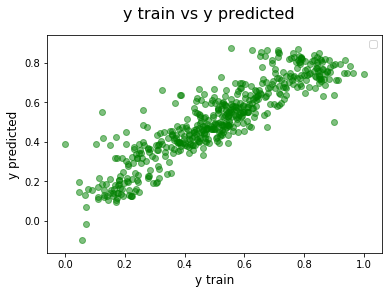

In [78]:
fig = plt.figure(figsize=(6,4))
plt.scatter(y_train,y_train_pred,marker ='o' , color='g' ,alpha=.5)
fig.suptitle('y train vs y predicted', fontsize=16)              # Plot heading 
plt.xlabel('y train', fontsize=12)                               # X-label
plt.ylabel('y predicted', fontsize=12)                          # Y-label
plt.legend()
plt.show()

***Y predicted and Y Train follow same pattern in the scatter plot***

### Residual plot

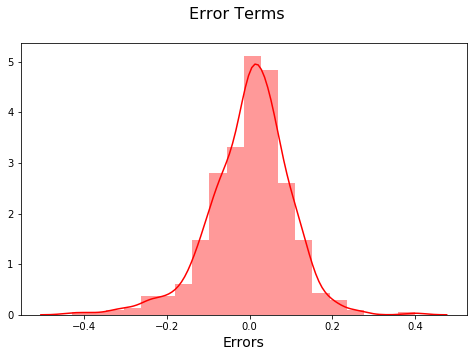

In [79]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(8,5))
sns.distplot((y_train - y_train_pred), bins = 20,color='r')
fig.suptitle('Error Terms', fontsize = 16)                  # Plot heading 
plt.xlabel('Errors', fontsize = 14)                         # X-label
plt.show()

***Error terms are normally distributed with mean at 0***

### QQ Plot

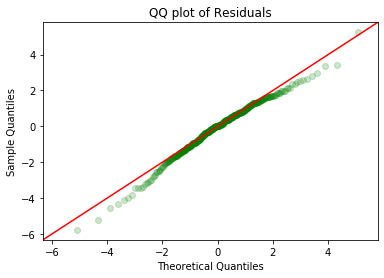

In [80]:
import scipy.stats as stats
res=(y_train - y_train_pred)
sm.qqplot(res, stats.t, fit=True, line='45', color='g', alpha = 0.2)
plt.title('QQ plot of Residuals')
plt.show()

***The residuals follow the quantile plot, with a normal distribution***

### Residual vs Predicted value

No handles with labels found to put in legend.


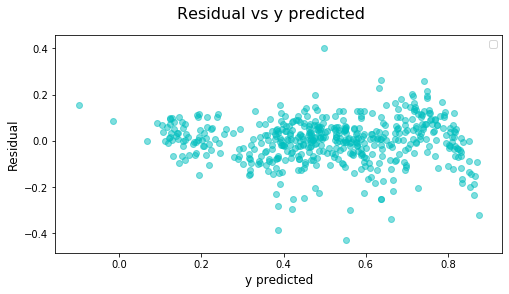

In [81]:
fig = plt.figure(figsize=(8,4))
plt.scatter(y= (y_train-y_train_pred),x= y_train_pred,marker ='o' , color='c' ,alpha=.5)
fig.suptitle('Residual vs y predicted', fontsize=16)              # Plot heading 
plt.ylabel('Residual', fontsize=12)                               # X-label
plt.xlabel('y predicted', fontsize=12)                          # Y-label
plt.legend()
plt.show()

# **Step 7 : Making Predictions**

**Features**

In [82]:
print(features)

['light_snow_or_rain', 'mist_or_cloudy', 'spring', 'yr', 'temp', 'windspeed']


## Scale the test data

**Transform the test data with Min max scaler using Scaler object**

In [83]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [84]:
df_test.head()

,light_snow_or_rain,mist_or_cloudy,Mon,Sat,Sun,Thu,Tue,Wed,August,December,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
408,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0.203567,0.422879,0.298701,0.391164
477,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0.327133,0.788347,0.579511,0.367234
604,0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,1,0.833859,0.637532,0.347440,0.807409
598,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0.758058,0.696229,0.098731,0.845950
171,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0.774672,0.792203,0.306415,0.553728


**Defining Test data for X (Independent variable) and y (Target variable)**

In [85]:
y_test = df_test.pop('cnt')
X_test = df_test[features]

In [86]:
print('Shape of testing  set X : ',X_test.shape)
print('Shape of testing  set y : ',y_test.shape)

Shape of testing  set X :  (219, 6)
Shape of testing  set y :  (219,)


**Predict the target for test data**

In [87]:
y_test_pred = lm.predict(X_test)

### **Accuracy (R$^2$) comparison for train and test data**

In [88]:
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

In [89]:
print('R2_Score for training set : %.2f%%'%(100*r2_train))
print('R2_Score for test set     : %.2f%%'%(100*r2_test))

R2_Score for training set : 80.78%
R2_Score for test set     : 80.42%


**Adjusted R$^2$ for train and test data**

In [90]:
adj_r2_train = adjr2_score(X_train_new.shape,r2_train)
adj_r2_test  = adjr2_score(X_test.shape, r2_test)

In [91]:
print('Adjusted R2_Score for training set : %.2f%%'%(100*adj_r2_train))
print('Adjusted R2_Score for test set     : %.2f%%'%(100*adj_r2_test))

Adjusted R2_Score for training set : 80.55%
Adjusted R2_Score for test set     : 79.86%


# **Step 8 : Model Evaluation**

**Plotting y_test and y_pred to understand the spread.**

No handles with labels found to put in legend.


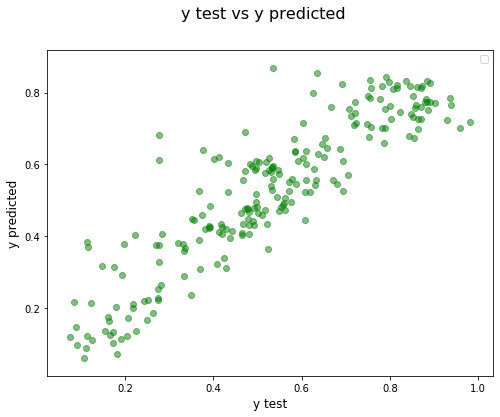

In [92]:
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test_pred,marker ='o' , color='g' ,alpha=.5)
fig.suptitle('y test vs y predicted', fontsize=16)              # Plot heading 
plt.xlabel('y test', fontsize=12)                               # X-label
plt.ylabel('y predicted', fontsize=12)                          # Y-label
plt.legend()
plt.show()

In [93]:
lr.params

const                 0.329107
light_snow_or_rain   -0.249555
mist_or_cloudy       -0.073626
spring               -0.167669
yr                    0.239832
temp                  0.347023
windspeed            -0.141119
dtype: float64

We can see that the equation of our best fitted line is:

$Bike  Rental  Count = (0.347  \times  temperature) + (0.240  \times  year) - (0.250 \times light snow or rain) - (0.074 \times mist or cloudy) - (0.168 \times spring) - (0.141  \times  windspeed) + 0.329$

- *1 unit increase in temperature increases the Bike Rental by 0.347 unit (keeping other features constant)*
- *1 unit increase in year increases the Bike Rental by 0.240 unit (keeping other features constant)*
- *1 unit decrease in light_snow_or_rain increases the Bike Rental by 0.250 unit (keeping other features constant)*
- *1 unit decrease in mist_or_cloudy increases the Bike Rental by 0.074 unit (keeping other features constant)*
- *1 unit decrease in spring increases the Bike Rental by 0.168 unit (keeping other features constant)*
- *1 unit decrease in windspeed increases the Bike Rental by 0.141 unit (keeping other features constant)*

*The variables are scaled*